[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Text(value='', description='User Input:', placeholder='Enter your text here')

Button(button_style='success', description='Submit', style=ButtonStyle(), tooltip='Click to generate response'…

Output()

Button(button_style='info', description='Generate Report', style=ButtonStyle(), tooltip='Click to generate sen…

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


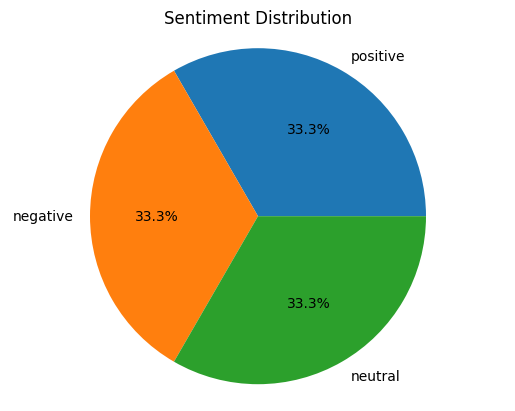

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end gene

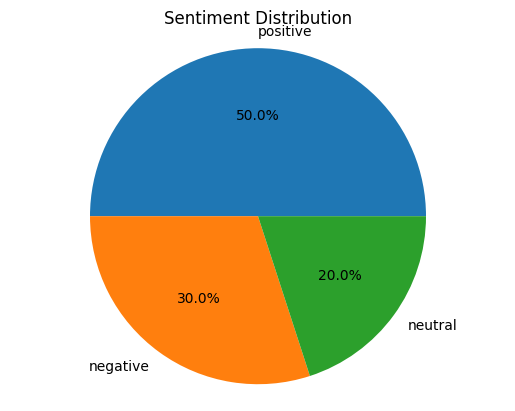

In [14]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline, set_seed
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# Download the required NLTK data
nltk.download('vader_lexicon')

# Set a seed value for reproducibility
set_seed(42)

# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Load the GPT-3 model and tokenizer from Hugging Face
tokenizer = AutoTokenizer.from_pretrained("microsoft/DialoGPT-large")
model = AutoModelForCausalLM.from_pretrained("microsoft/DialoGPT-large")

# Initialize the GPT-3 text generation pipeline
generator = pipeline('text-generation', model=model, tokenizer=tokenizer)

# Dictionary to store sentiment counts
sentiment_counts = {'positive': 0, 'negative': 0, 'neutral': 0}

# Create the user input widget
user_input = widgets.Text(
    placeholder='Enter your text here',
    description='User Input:',
    disabled=False
)

# Create the response output widget
response_output = widgets.Output()

# Function to handle user input and generate response
def generate_response(user_text):
    response, sentiment = get_response_and_sentiment(user_text)
    update_sentiment_counts(sentiment)
    with response_output:
        clear_output()
        print(f"Response: {response}")

# Function to get response and perform sentiment analysis
def get_response_and_sentiment(user_input):
    # Generate response using GPT-3 model
    response = generator(user_input, max_length=100, num_return_sequences=1)[0]['generated_text']

    # Perform sentiment analysis on the generated response
    scores = sid.polarity_scores(response)
    sentiment = 'negative' if scores['neg'] > scores['pos'] else ('positive' if scores['pos'] > scores['neg'] else 'neutral')

    return response, sentiment

# Function to update sentiment counts
def update_sentiment_counts(sentiment):
    sentiment_counts[sentiment] += 1

# Function to generate report and visualize sentiment distribution
def generate_report(button):
    # Create a pie chart for sentiment distribution
    labels = list(sentiment_counts.keys())
    values = list(sentiment_counts.values())
    fig, ax = plt.subplots()
    ax.pie(values, labels=labels, autopct='%1.1f%%')
    ax.axis('equal')
    ax.set_title('Sentiment Distribution')
    plt.show()

# Create the submit button
submit_button = widgets.Button(
    description='Submit',
    button_style='success',
    tooltip='Click to generate response'
)

# Create the report button
report_button = widgets.Button(
    description='Generate Report',
    button_style='info',
    tooltip='Click to generate sentiment distribution report'
)

# Bind the button clicks to their respective functions
submit_button.on_click(lambda _: generate_response(user_input.value))
report_button.on_click(generate_report)

# Display the widgets
display(user_input, submit_button, response_output, report_button)